# Import

In [1]:
from make_dataset import Dataset
from preprocess import *
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
tqdm.pandas(desc="Processing text")

In [4]:
print("Current Working Directory:", os.getcwd())

Current Working Directory: e:\2_LEARNING_BKU\2_File_2\K22_HK242\CO3117_Machine_Learning\Main\src\data


# First Dataset

In [5]:
# Example: Load a CSV file and initialize the Dataset class
file_path = "../../data/raw/kazanova_sentiment140_training.1600000.processed.noemoticon_with_headers.csv"
df = pd.read_csv(file_path, encoding='latin1')
dataset = Dataset(df)

In [6]:
dataset.show_overview()

Dataset Overview:
Number of Rows: 1600000
Number of Columns: 6

Columns:
['target', 'ids', 'date', 'flag', 'user', 'text']

Missing Values:
target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

Sample Data:
   target         ids                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4         

In [7]:
df['text_length'] = df['text'].astype(str).progress_apply(lambda x: len(x.split()))

Processing text: 100%|██████████| 1600000/1600000 [00:10<00:00, 151596.03it/s]


In [8]:
dataset.update_dataframe(df)

Updating the dataset...


Plotting distribution for column: target


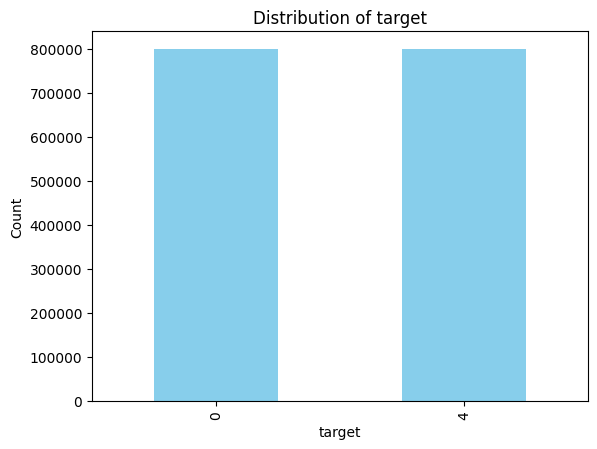

In [9]:
dataset.plot_column_distribution("target")

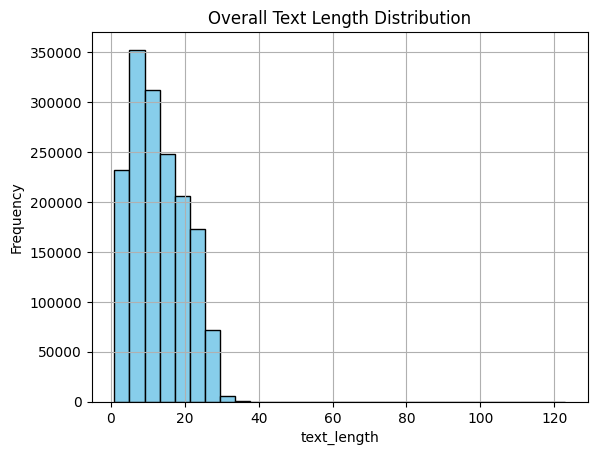

In [10]:
dataset.plot_histogram('text_length', bins=30, title="Overall Text Length Distribution")

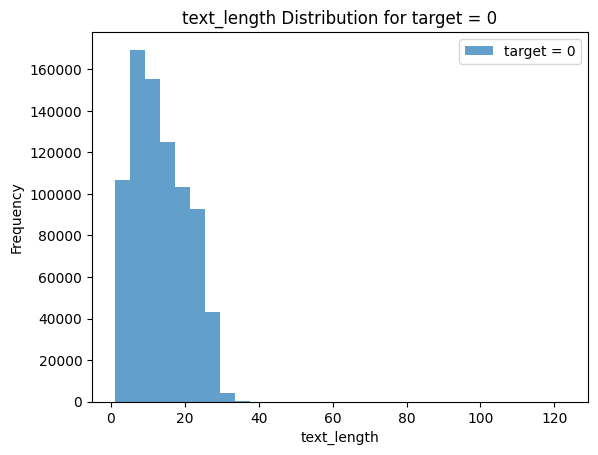

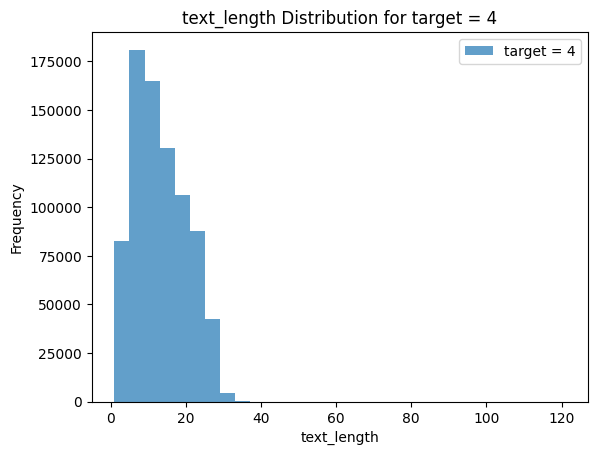

In [11]:
dataset.plot_grouped_histogram('text_length', group_by='target', bins=30)

In [ ]:
df['text_clean'] = df['text'].astype(str).progress_apply(lambda x: text_preprocessing(text=x))


Processing text: 100%|██████████| 1600000/1600000 [37:33<00:00, 709.99it/s] 


In [19]:
df['text_clean_length'] = df['text_clean'].astype(str).progress_apply(lambda x: len(x.split()))

Processing text: 100%|██████████| 1600000/1600000 [00:07<00:00, 200383.54it/s]


In [20]:
# Select only the desired columns
df = df[['target', 'text', 'text_clean', 'text_length', 'text_clean_length']]

# Display the updated DataFrame
print(df.head())

   target                                               text  \
0       0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1       0  is upset that he can't update his Facebook by ...   
2       0  @Kenichan I dived many times for the ball. Man...   
3       0    my whole body feels itchy and like its on fire    
4       0  @nationwideclass no, it's not behaving at all....   

                                          text_clean  text_length  \
0  switchfoot awww thats bummer shoulda got david...           19   
1  upset cant update facebook texting might cry r...           21   
2  kenichan dived many times ball managed save  r...           18   
3                   whole body feels itchy like fire           10   
4           nationwideclass behaving im mad cant see           21   

   text_clean_length  
0                 10  
1                 12  
2                 10  
3                  6  
4                  6  


In [21]:
dataset.update_dataframe(df)

Updating the dataset...


In [22]:
dataset.show_overview()

Dataset Overview:
Number of Rows: 1600000
Number of Columns: 5

Columns:
['target', 'text', 'text_clean', 'text_length', 'text_clean_length']

Missing Values:
target               0
text                 0
text_clean           0
text_length          0
text_clean_length    0
dtype: int64

Sample Data:
   target                                               text  \
0       0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1       0  is upset that he can't update his Facebook by ...   
2       0  @Kenichan I dived many times for the ball. Man...   
3       0    my whole body feels itchy and like its on fire    
4       0  @nationwideclass no, it's not behaving at all....   

                                          text_clean  text_length  \
0  switchfoot awww thats bummer shoulda got david...           19   
1  upset cant update facebook texting might cry r...           21   
2  kenichan dived many times ball managed save  r...           18   
3                   whole body feels i

In [23]:
print("\nDataFrame with Cleaned Text:")
print(df.head())

df.to_csv("../../data/processed/df1_with_text_clean.csv", index=False)


DataFrame with Cleaned Text:
   target                                               text  \
0       0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1       0  is upset that he can't update his Facebook by ...   
2       0  @Kenichan I dived many times for the ball. Man...   
3       0    my whole body feels itchy and like its on fire    
4       0  @nationwideclass no, it's not behaving at all....   

                                          text_clean  text_length  \
0  switchfoot awww thats bummer shoulda got david...           19   
1  upset cant update facebook texting might cry r...           21   
2  kenichan dived many times ball managed save  r...           18   
3                   whole body feels itchy like fire           10   
4           nationwideclass behaving im mad cant see           21   

   text_clean_length  
0                 10  
1                 12  
2                 10  
3                  6  
4                  6  


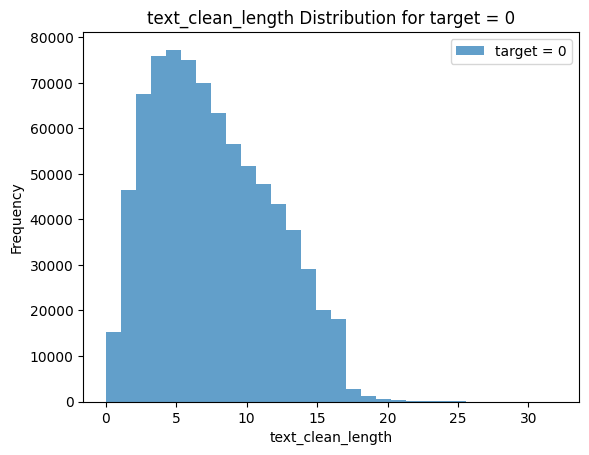

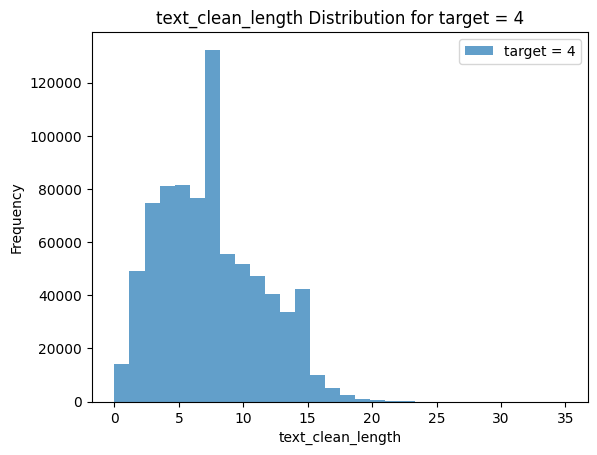

In [24]:
dataset.plot_grouped_histogram('text_clean_length', group_by='target', bins=30)

# Second Dataset

In [25]:
# Example: Load a CSV file and initialize the Dataset class
file_path2 = "../../data/raw/yasserh_twitter-tweets-sentiment-dataset_Tweets_with_headers.csv"
df2 = pd.read_csv(file_path2, encoding='latin1')
dataset2 = Dataset(df2)

In [26]:
dataset2.show_overview()

Dataset Overview:
Number of Rows: 27481
Number of Columns: 4

Columns:
['textID', 'text', 'selected_text', 'sentiment']

Missing Values:
textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

Sample Data:
       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative  


In [27]:
df2['text_length'] = df2['text'].astype(str).progress_apply(lambda x: len(x.split()))

Processing text: 100%|██████████| 27481/27481 [00:00<00:00, 171859.87it/s]


In [28]:
dataset2.update_dataframe(df2)

Updating the dataset...


Plotting distribution for column: sentiment


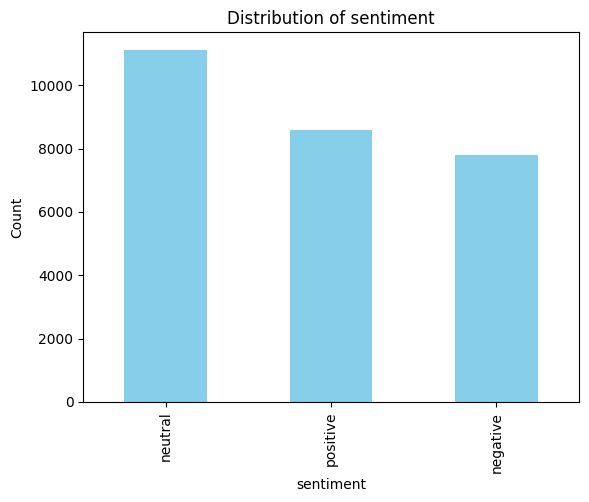

In [29]:
dataset2.plot_column_distribution("sentiment")

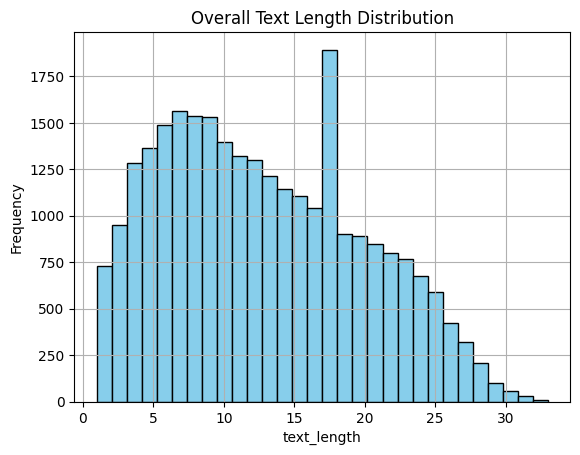

In [30]:
dataset2.plot_histogram('text_length', bins=30, title="Overall Text Length Distribution")

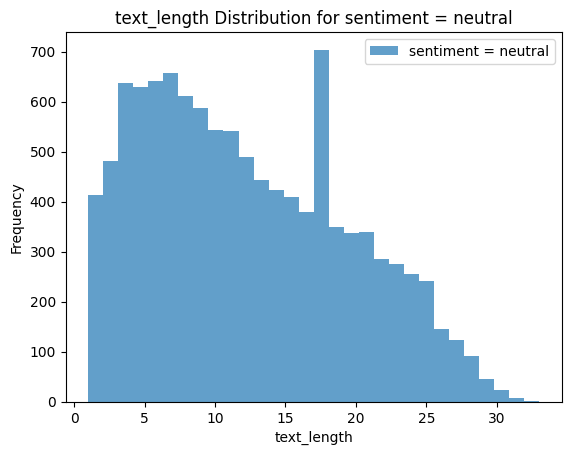

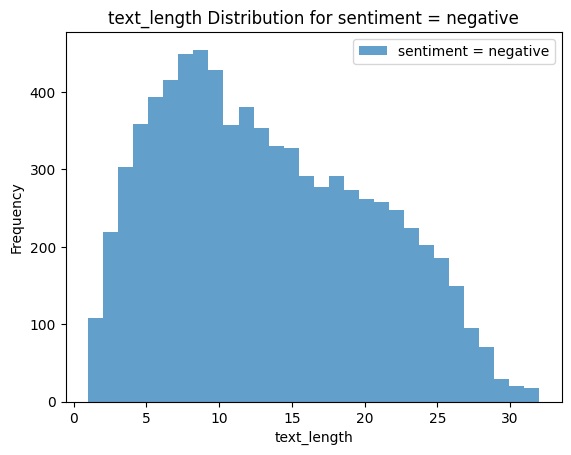

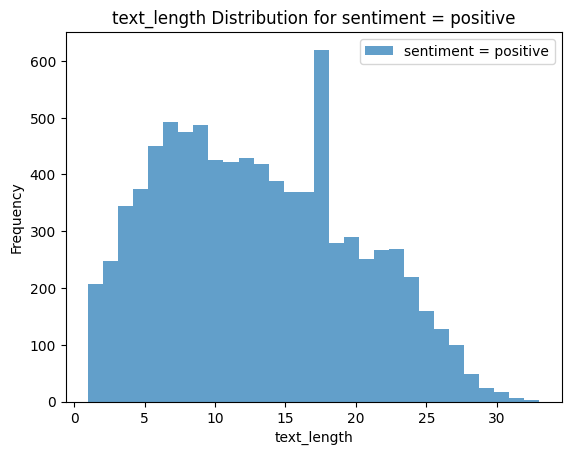

In [31]:
dataset2.plot_grouped_histogram('text_length', group_by='sentiment', bins=30)

In [ ]:
df2['text_clean'] = df2['text'].astype(str).progress_apply(lambda x: text_preprocessing(text=x))


Processing text: 100%|██████████| 27481/27481 [00:33<00:00, 826.21it/s] 


In [33]:
df2['text_clean_length'] = df2['text_clean'].astype(str).progress_apply(lambda x: len(x.split()))

Processing text: 100%|██████████| 27481/27481 [00:00<00:00, 170708.39it/s]


In [34]:
df2.head()

,textID,text,selected_text,sentiment,text_length,text_clean,text_clean_length
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,7,id responded going,3
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,10,sooo sad miss san diego,5
2,088c60f138,my boss is bullying me...,bullying me,negative,5,boss bullying,2
3,9642c003ef,what interview! leave me alone,leave me alone,negative,5,interview leave alone,3
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,14,sons couldnt put releases already bought,6


In [35]:
# Select only the desired columns
df2 = df2[['sentiment', 'text', 'text_clean', 'text_length', 'text_clean_length']]

# Display the updated DataFrame
print(df2.head())

  sentiment                                               text  \
0   neutral                I`d have responded, if I were going   
1  negative      Sooo SAD I will miss you here in San Diego!!!   
2  negative                          my boss is bullying me...   
3  negative                     what interview! leave me alone   
4  negative   Sons of ****, why couldn`t they put them on t...   

                                 text_clean  text_length  text_clean_length  
0                        id responded going            7                  3  
1                   sooo sad miss san diego           10                  5  
2                             boss bullying            5                  2  
3                     interview leave alone            5                  3  
4  sons couldnt put releases already bought           14                  6  


In [36]:
dataset2.update_dataframe(df2)

Updating the dataset...


In [37]:
dataset2.show_overview()

Dataset Overview:
Number of Rows: 27481
Number of Columns: 5

Columns:
['sentiment', 'text', 'text_clean', 'text_length', 'text_clean_length']

Missing Values:
sentiment            0
text                 1
text_clean           0
text_length          0
text_clean_length    0
dtype: int64

Sample Data:
  sentiment                                               text  \
0   neutral                I`d have responded, if I were going   
1  negative      Sooo SAD I will miss you here in San Diego!!!   
2  negative                          my boss is bullying me...   
3  negative                     what interview! leave me alone   
4  negative   Sons of ****, why couldn`t they put them on t...   

                                 text_clean  text_length  text_clean_length  
0                        id responded going            7                  3  
1                   sooo sad miss san diego           10                  5  
2                             boss bullying            5           

In [38]:
# Rename the sentiment column to target
df2.rename(columns={"sentiment": "target"}, inplace=True)

# Map sentiment values to numerical values
sentiment_mapping = {
    "negative": 0,
    "neutral": 2,
    "positive": 4
}
df2["target"] = df2["target"].map(sentiment_mapping)

In [39]:
df2.head()

,target,text,text_clean,text_length,text_clean_length
0,2,"I`d have responded, if I were going",id responded going,7,3
1,0,Sooo SAD I will miss you here in San Diego!!!,sooo sad miss san diego,10,5
2,0,my boss is bullying me...,boss bullying,5,2
3,0,what interview! leave me alone,interview leave alone,5,3
4,0,"Sons of ****, why couldn`t they put them on t...",sons couldnt put releases already bought,14,6


In [40]:
print("\nDataFrame with Cleaned Text:")
print(df2.head())

df2.to_csv("../../data/processed/df2_with_text_clean.csv", index=False)


DataFrame with Cleaned Text:
   target                                               text  \
0       2                I`d have responded, if I were going   
1       0      Sooo SAD I will miss you here in San Diego!!!   
2       0                          my boss is bullying me...   
3       0                     what interview! leave me alone   
4       0   Sons of ****, why couldn`t they put them on t...   

                                 text_clean  text_length  text_clean_length  
0                        id responded going            7                  3  
1                   sooo sad miss san diego           10                  5  
2                             boss bullying            5                  2  
3                     interview leave alone            5                  3  
4  sons couldnt put releases already bought           14                  6  


# Third Dataset

In [41]:
# Example: Load a CSV file and initialize the Dataset class
file_path3 = "../../data/raw/saurabhshahane_twitter-sentiment-dataset_Twitter_Data_with_headers.csv"
df3 = pd.read_csv(file_path3, encoding='latin1')
dataset3 = Dataset(df3)

In [42]:
dataset3.show_overview()

Dataset Overview:
Number of Rows: 162980
Number of Columns: 2

Columns:
['clean_text', 'category']

Missing Values:
clean_text    4
category      7
dtype: int64

Sample Data:
                                          clean_text  category
0  when modi promised Ã¢ÂÂminimum government ma...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [43]:
df3['text_length'] = df3['clean_text'].astype(str).progress_apply(lambda x: len(x.split()))

Processing text: 100%|██████████| 162980/162980 [00:01<00:00, 123597.24it/s]


In [44]:
dataset3.update_dataframe(df3)

Updating the dataset...


Plotting distribution for column: category


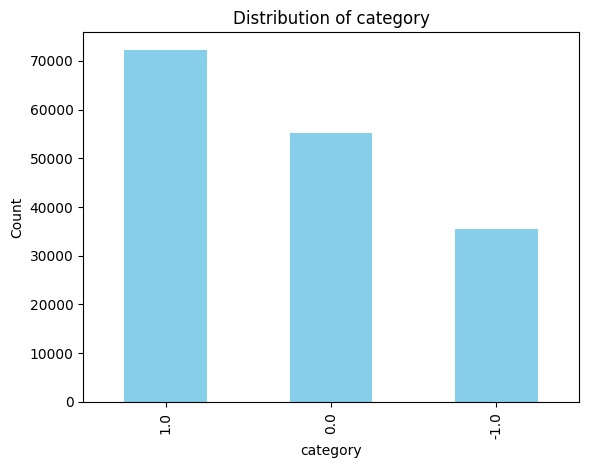

In [45]:
dataset3.plot_column_distribution("category")

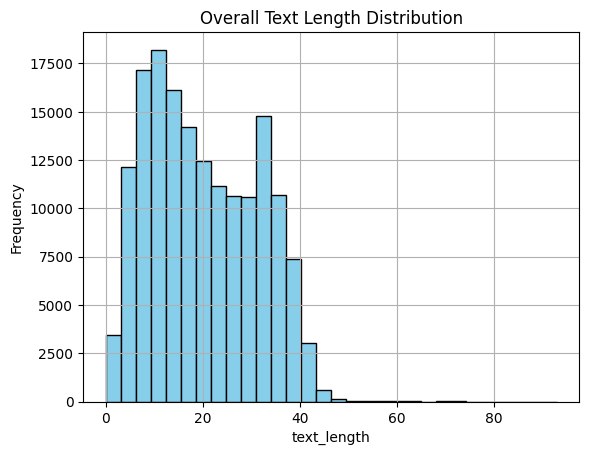

In [46]:
dataset3.plot_histogram('text_length', bins=30, title="Overall Text Length Distribution")

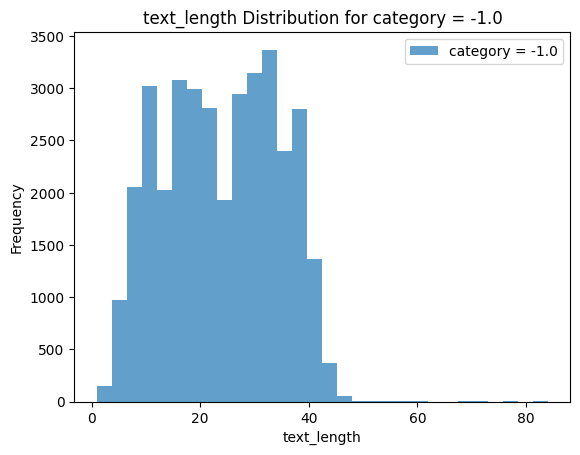

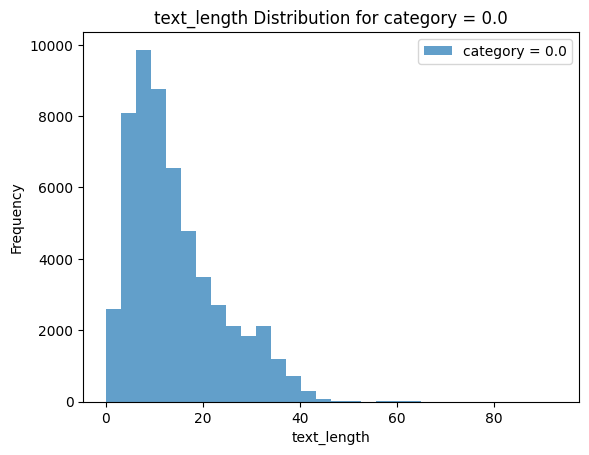

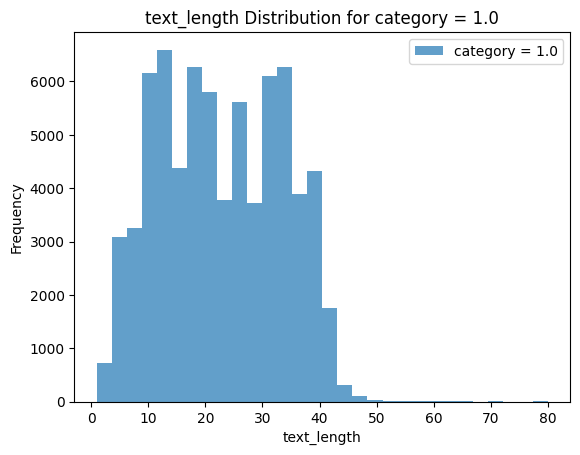

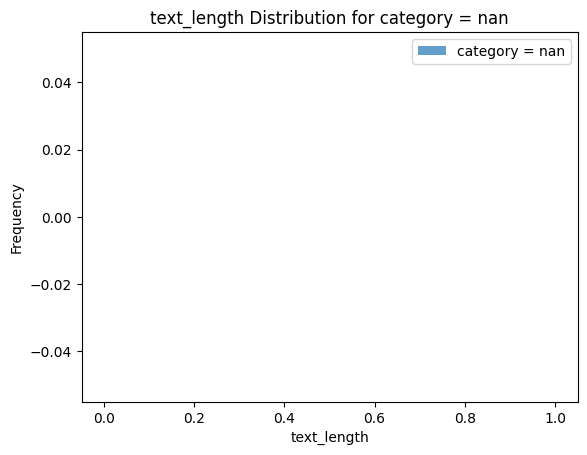

In [47]:
dataset3.plot_grouped_histogram('text_length', group_by='category', bins=30)

In [ ]:
df3.rename(columns={"clean_text": "text"}, inplace=True)
df3['text_clean'] = df3['text'].astype(str).progress_apply(lambda x: text_preprocessing(text=x))


Processing text: 100%|██████████| 162980/162980 [02:19<00:00, 1171.36it/s]


In [49]:
df3['text_clean_length'] = df3['text_clean'].astype(str).progress_apply(lambda x: len(x.split()))

Processing text: 100%|██████████| 162980/162980 [00:00<00:00, 221006.42it/s]


In [50]:
df3.head()

,text,category,text_length,text_clean,text_clean_length
0,when modi promised Ã¢ÂÂminimum government ma...,-1.0,33,modi promised minimum government maximum gover...,21
1,talk all the nonsense and continue all the dra...,0.0,13,talk nonsense continue drama vote modi,6
2,what did just say vote for modi welcome bjp t...,1.0,22,say vote modi welcome bjp told rahul main camp...,13
3,asking his supporters prefix chowkidar their n...,1.0,34,asking supporters prefix chowkidar names modi ...,19
4,answer who among these the most powerful world...,1.0,14,answer among powerful world leader today trump...,10


In [51]:
dataset3.update_dataframe(df3)

Updating the dataset...


In [52]:
dataset3.show_overview()

Dataset Overview:
Number of Rows: 162980
Number of Columns: 5

Columns:
['text', 'category', 'text_length', 'text_clean', 'text_clean_length']

Missing Values:
text                 4
category             7
text_length          0
text_clean           0
text_clean_length    0
dtype: int64

Sample Data:
                                                text  category  text_length  \
0  when modi promised Ã¢ÂÂminimum government ma...      -1.0           33   
1  talk all the nonsense and continue all the dra...       0.0           13   
2  what did just say vote for modi  welcome bjp t...       1.0           22   
3  asking his supporters prefix chowkidar their n...       1.0           34   
4  answer who among these the most powerful world...       1.0           14   

                                          text_clean  text_clean_length  
0  modi promised minimum government maximum gover...                 21  
1             talk nonsense continue drama vote modi                  6  
2

In [53]:
# Rename the sentiment column to target
df3.rename(columns={"category": "target"}, inplace=True)

# negative(-1), neutral(0), and positive(+1)
sentiment_mapping = {
    -1: "negative",
    0: "neutral",
    1: "positive"
}
df3["target"] = df3["target"].map(sentiment_mapping)

sentiment_mapping = {
    "negative": 0,
    "neutral": 2,
    "positive": 4
}
df3["target"] = df3["target"].map(sentiment_mapping)

In [54]:
df3.head()

,text,target,text_length,text_clean,text_clean_length
0,when modi promised Ã¢ÂÂminimum government ma...,0.0,33,modi promised minimum government maximum gover...,21
1,talk all the nonsense and continue all the dra...,2.0,13,talk nonsense continue drama vote modi,6
2,what did just say vote for modi welcome bjp t...,4.0,22,say vote modi welcome bjp told rahul main camp...,13
3,asking his supporters prefix chowkidar their n...,4.0,34,asking supporters prefix chowkidar names modi ...,19
4,answer who among these the most powerful world...,4.0,14,answer among powerful world leader today trump...,10


In [55]:
print("\nDataFrame with Cleaned Text:")
print(df3.head())

df3.to_csv("../../data/processed/df3_with_text_clean.csv", index=False)


DataFrame with Cleaned Text:
                                                text  target  text_length  \
0  when modi promised Ã¢ÂÂminimum government ma...     0.0           33   
1  talk all the nonsense and continue all the dra...     2.0           13   
2  what did just say vote for modi  welcome bjp t...     4.0           22   
3  asking his supporters prefix chowkidar their n...     4.0           34   
4  answer who among these the most powerful world...     4.0           14   

                                          text_clean  text_clean_length  
0  modi promised minimum government maximum gover...                 21  
1             talk nonsense continue drama vote modi                  6  
2  say vote modi welcome bjp told rahul main camp...                 13  
3  asking supporters prefix chowkidar names modi ...                 19  
4  answer among powerful world leader today trump...                 10  


# Merge dataset

In [56]:
path1 = "../../data/processed/df1_with_text_clean.csv"
path2 = "../../data/processed/df2_with_text_clean.csv"
path3 = "../../data/processed/df3_with_text_clean.csv"

In [57]:
df1 = pd.read_csv(path1, encoding='latin1')
df1.head()

,target,text,text_clean,text_length,text_clean_length
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot awww thats bummer shoulda got david...,19,10
1,0,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...,21,12
2,0,@Kenichan I dived many times for the ball. Man...,kenichan dived many times ball managed save r...,18,10
3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire,10,6
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving im mad cant see,21,6


In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 5 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   target             1600000 non-null  int64 
 1   text               1600000 non-null  object
 2   text_clean         1598476 non-null  object
 3   text_length        1600000 non-null  int64 
 4   text_clean_length  1600000 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 61.0+ MB


In [59]:
# Filter the DataFrame for rows where text_clean is null
rows_with_null_text_clean = df1[df1['text_clean'].isnull()]

# Display the rows
print(rows_with_null_text_clean)

         target                                      text text_clean  \
3997          0                               what to do         NaN   
4233          0                                     just         NaN   
5284          0        and here  http://twitpic.com/2yaxf        NaN   
6446          0                            @Street3 very         NaN   
13232         0                                 @ASOT400         NaN   
...         ...                                       ...        ...   
1597684       4  @patty4sound http://twitpic.com/7iuns -         NaN   
1598194       4                @awesomeashley9 me too!!!         NaN   
1598921       4                                 If only?         NaN   
1599494       4                          @Sworn4DaBosses         NaN   
1599811       4                           to be with you         NaN   

         text_length  text_clean_length  
3997               3                  0  
4233               1                  0  
5284     

In [60]:
df2 = pd.read_csv(path2, encoding='latin1')
df2.head()

,target,text,text_clean,text_length,text_clean_length
0,2,"I`d have responded, if I were going",id responded going,7,3
1,0,Sooo SAD I will miss you here in San Diego!!!,sooo sad miss san diego,10,5
2,0,my boss is bullying me...,boss bullying,5,2
3,0,what interview! leave me alone,interview leave alone,5,3
4,0,"Sons of ****, why couldn`t they put them on t...",sons couldnt put releases already bought,14,6


In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   target             27481 non-null  int64 
 1   text               27480 non-null  object
 2   text_clean         27411 non-null  object
 3   text_length        27481 non-null  int64 
 4   text_clean_length  27481 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.0+ MB


In [62]:
df3 = pd.read_csv(path3, encoding='latin1')
df3.head()

,text,target,text_length,text_clean,text_clean_length
0,when modi promised ÃÂ¢ÃÂÃÂminimum governm...,0.0,33,modi promised minimum government maximum gover...,21
1,talk all the nonsense and continue all the dra...,2.0,13,talk nonsense continue drama vote modi,6
2,what did just say vote for modi welcome bjp t...,4.0,22,say vote modi welcome bjp told rahul main camp...,13
3,asking his supporters prefix chowkidar their n...,4.0,34,asking supporters prefix chowkidar names modi ...,19
4,answer who among these the most powerful world...,4.0,14,answer among powerful world leader today trump...,10


In [63]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   text               162976 non-null  object 
 1   target             162973 non-null  float64
 2   text_length        162980 non-null  int64  
 3   text_clean         162894 non-null  object 
 4   text_clean_length  162980 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 6.2+ MB


In [64]:
# Filter the DataFrame for rows where text_clean is null
rows_with_null_text_clean3 = df3[df3['text_clean'].isnull()]

# Display the rows
print(rows_with_null_text_clean3)

                   text  target  text_length text_clean  text_clean_length
148                 NaN     2.0            1        NaN                  1
1988         there you      2.0            2        NaN                  0
3684        10800rsonly     2.0            1        NaN                  0
3912          what out      2.0            2        NaN                  0
4586         then then      2.0            2        NaN                  0
...                 ...     ...          ...        ...                ...
157323  and once again      2.0            3        NaN                  0
158694              NaN     0.0            1        NaN                  1
159443              NaN     2.0            1        NaN                  1
160560              NaN     4.0            1        NaN                  1
161347             2019     2.0            1        NaN                  0

[86 rows x 5 columns]


In [65]:
merged_df = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1790461 entries, 0 to 1790460
Data columns (total 5 columns):
 #   Column             Dtype  
---  ------             -----  
 0   target             float64
 1   text               object 
 2   text_clean         object 
 3   text_length        int64  
 4   text_clean_length  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 68.3+ MB
None


In [66]:
merged_df.head()

,target,text,text_clean,text_length,text_clean_length
0,0.0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot awww thats bummer shoulda got david...,19,10
1,0.0,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...,21,12
2,0.0,@Kenichan I dived many times for the ball. Man...,kenichan dived many times ball managed save r...,18,10
3,0.0,my whole body feels itchy and like its on fire,whole body feels itchy like fire,10,6
4,0.0,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving im mad cant see,21,6


In [67]:
merged_df = merged_df.dropna(subset=['text', 'text_clean', 'target'])
merged_df = merged_df.drop_duplicates()

In [68]:
dataset_merged = Dataset(merged_df)
dataset_merged.show_overview()

Dataset Overview:
Number of Rows: 1771426
Number of Columns: 5

Columns:
['target', 'text', 'text_clean', 'text_length', 'text_clean_length']

Missing Values:
target               0
text                 0
text_clean           0
text_length          0
text_clean_length    0
dtype: int64

Sample Data:
   target                                               text  \
0     0.0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1     0.0  is upset that he can't update his Facebook by ...   
2     0.0  @Kenichan I dived many times for the ball. Man...   
3     0.0    my whole body feels itchy and like its on fire    
4     0.0  @nationwideclass no, it's not behaving at all....   

                                          text_clean  text_length  \
0  switchfoot awww thats bummer shoulda got david...           19   
1  upset cant update facebook texting might cry r...           21   
2  kenichan dived many times ball managed save  r...           18   
3                   whole body feels i

Plotting distribution for column: target


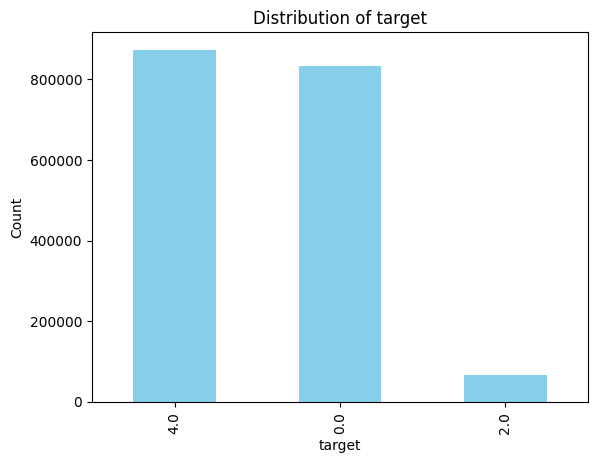

In [69]:
dataset_merged.plot_column_distribution("target")

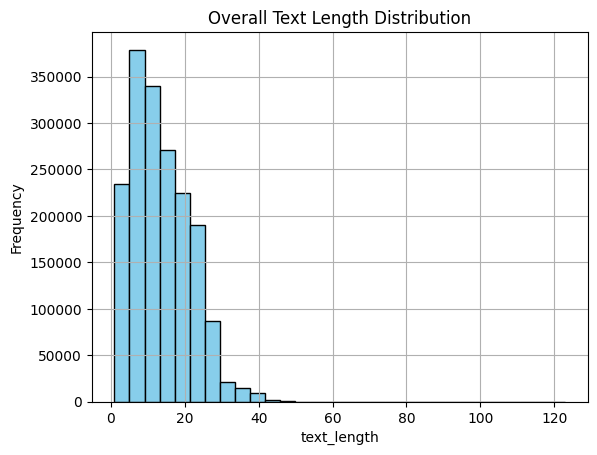

In [70]:
dataset_merged.plot_histogram('text_length', bins=30, title="Overall Text Length Distribution")

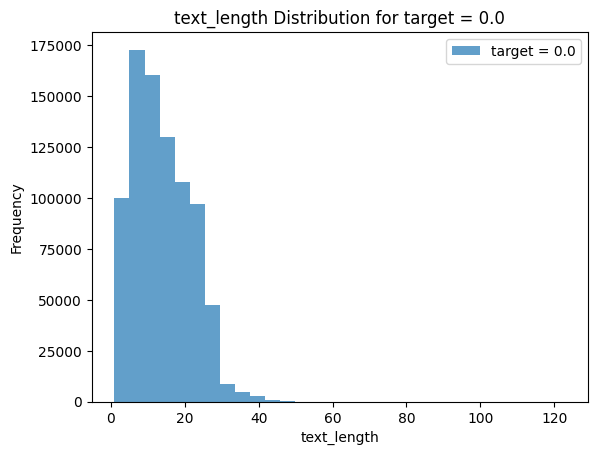

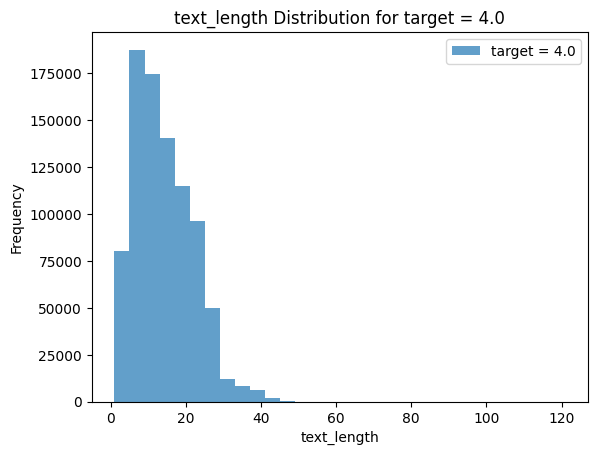

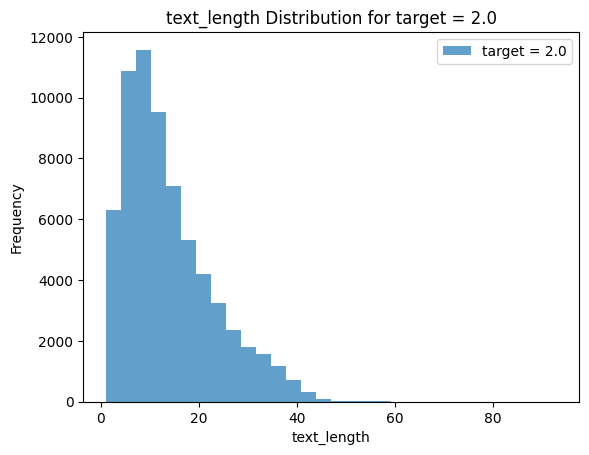

In [71]:
dataset_merged.plot_grouped_histogram('text_length', group_by='target', bins=30)

In [72]:
# Save the full cleaned dataset to 'final_clean.csv'
merged_df.to_csv("../../data/final/final_clean.csv", index=False)
print("Full dataset saved as 'final_clean.csv'.")

# Filter out rows where 'target' is 2
merged_df_no_neutral = merged_df[merged_df['target'] != 2]
merged_df_no_neutral.to_csv("../../data/final/final_clean_no_neutral.csv", index=False)
print("Dataset without neutral rows saved as 'final_clean_no_neutral.csv'.")


Full dataset saved as 'final_clean.csv'.
Dataset without neutral rows saved as 'final_clean_no_neutral.csv'.


In [ ]:
# Load the full cleaned dataset
merged_df = pd.read_csv("../../data/final/final_clean.csv")
print("Full cleaned dataset loaded.")

# Load the dataset without neutral rows
merged_df_no_neutral = pd.read_csv("../../data/final/final_clean_no_neutral.csv")
print("Dataset without neutral rows loaded.")

# Remove duplicates based on the 'text_clean' column in both datasets
merged_df_no_duplicates = merged_df.drop_duplicates(subset=['text_clean'], keep='first')
print("Duplicates removed from the full cleaned dataset.")

merged_df_no_neutral_no_duplicates = merged_df_no_neutral.drop_duplicates(subset=['text_clean'], keep='first')
print("Duplicates removed from the dataset without neutral rows.")



Full cleaned dataset loaded.
Dataset without neutral rows loaded.
Duplicates removed from the full cleaned dataset.
Duplicates removed from the dataset without neutral rows.


In [74]:
merged_df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1709421 entries, 0 to 1771425
Data columns (total 5 columns):
 #   Column             Dtype  
---  ------             -----  
 0   target             float64
 1   text               object 
 2   text_clean         object 
 3   text_length        int64  
 4   text_clean_length  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 78.3+ MB


In [75]:
merged_df_no_neutral_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1652310 entries, 0 to 1705236
Data columns (total 5 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   target             1652310 non-null  float64
 1   text               1652310 non-null  object 
 2   text_clean         1652310 non-null  object 
 3   text_length        1652310 non-null  int64  
 4   text_clean_length  1652310 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 75.6+ MB


In [76]:
# Save the datasets back to CSV
merged_df_no_duplicates.to_csv("../../data/final/final_clean_no_duplicates_v1.csv", index=False)
print("Full cleaned dataset without duplicates saved as 'final_clean_no_duplicates_v1.csv'.")

merged_df_no_neutral_no_duplicates.to_csv("../../data/final/final_clean_no_neutral_no_duplicates_v1.csv", index=False)
print("Dataset without neutral rows and duplicates saved as 'final_clean_no_neutral_no_duplicates_v1.csv'.")


Full cleaned dataset without duplicates saved as 'final_clean_no_duplicates_v1.csv'.
Dataset without neutral rows and duplicates saved as 'final_clean_no_neutral_no_duplicates_v1.csv'.


# Test visualize

In [2]:
from make_dataset import Dataset
from preprocess import *
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [4]:
merged_df_no_neutral = pd.read_csv("../../data/final/final_clean_no_neutral_no_duplicates_v1.csv")
print("Dataset without neutral rows loaded.")

dataset_merged = Dataset(merged_df_no_neutral)


Dataset without neutral rows loaded.


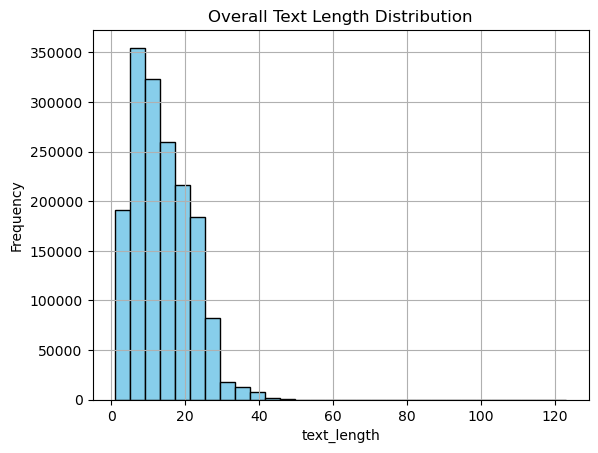

In [5]:
dataset_merged.plot_histogram('text_length', bins=30, title="Overall Text Length Distribution")

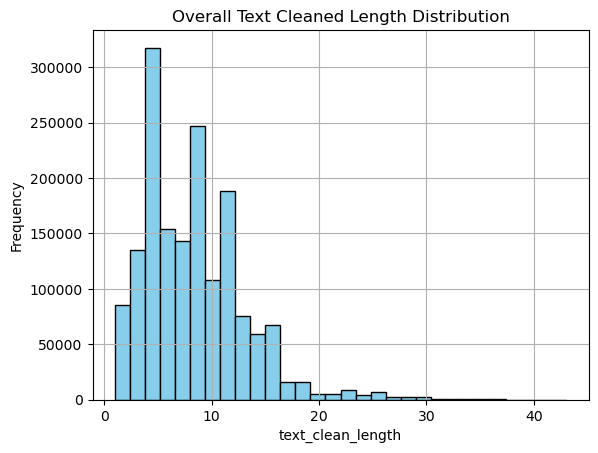

In [6]:
dataset_merged.plot_histogram('text_clean_length', bins=30, title="Overall Text Cleaned Length Distribution")